#1.Package Installation: Installing required Python packages using pip, including upgrading torch, and installing pytube, whisper, and librosa.

In [1]:
#Installing required packages
!pip install --upgrade torch
!pip install pytube
!pip install git+https://github.com/openai/whisper.git
!pip install git+https://github.com/librosa/librosa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 61.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 61.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 81.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.8/209.8 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [2]:
#Importing the necessary libraries
import torch
import whisper
import pytube
import librosa
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd

#Loading Whisper Model:
Loading the Whisper ASR model with the 'medium' configuration.

In [3]:
model_m = whisper.load_model('medium')


100%|██████████████████████████████████████| 1.42G/1.42G [00:14<00:00, 104MiB/s]


In [4]:
file_path='/content/voice.05.42 AM.wav'

#Loading Audio File:
Loading an audio file using Whisper's load_audio function.

In [6]:

#Loading
audio_13 = whisper.load_audio(file_path)
audio_13

array([0.        , 0.        , 0.        , ..., 0.00311279, 0.00384521,
       0.00439453], dtype=float32)

In [7]:
T = 13
#Checking the number of samples in our audio file
n_samples = audio_13.shape[0]
n_samples


47926

In [8]:
#Time between samples
delta = T/n_samples
delta

0.00027125151274882107

In [9]:
#Sampling frequency
Fs = 1/delta
Fs

3686.615384615385

In [10]:
#Time of each sample
time = np.linspace(0,(n_samples-1) * delta,n_samples)
time

array([0.00000000e+00, 2.71251513e-04, 5.42503025e-04, ...,
       1.29991862e+01, 1.29994575e+01, 1.29997287e+01])

#Signal Visualization:
Visualizing the audio signal over time.

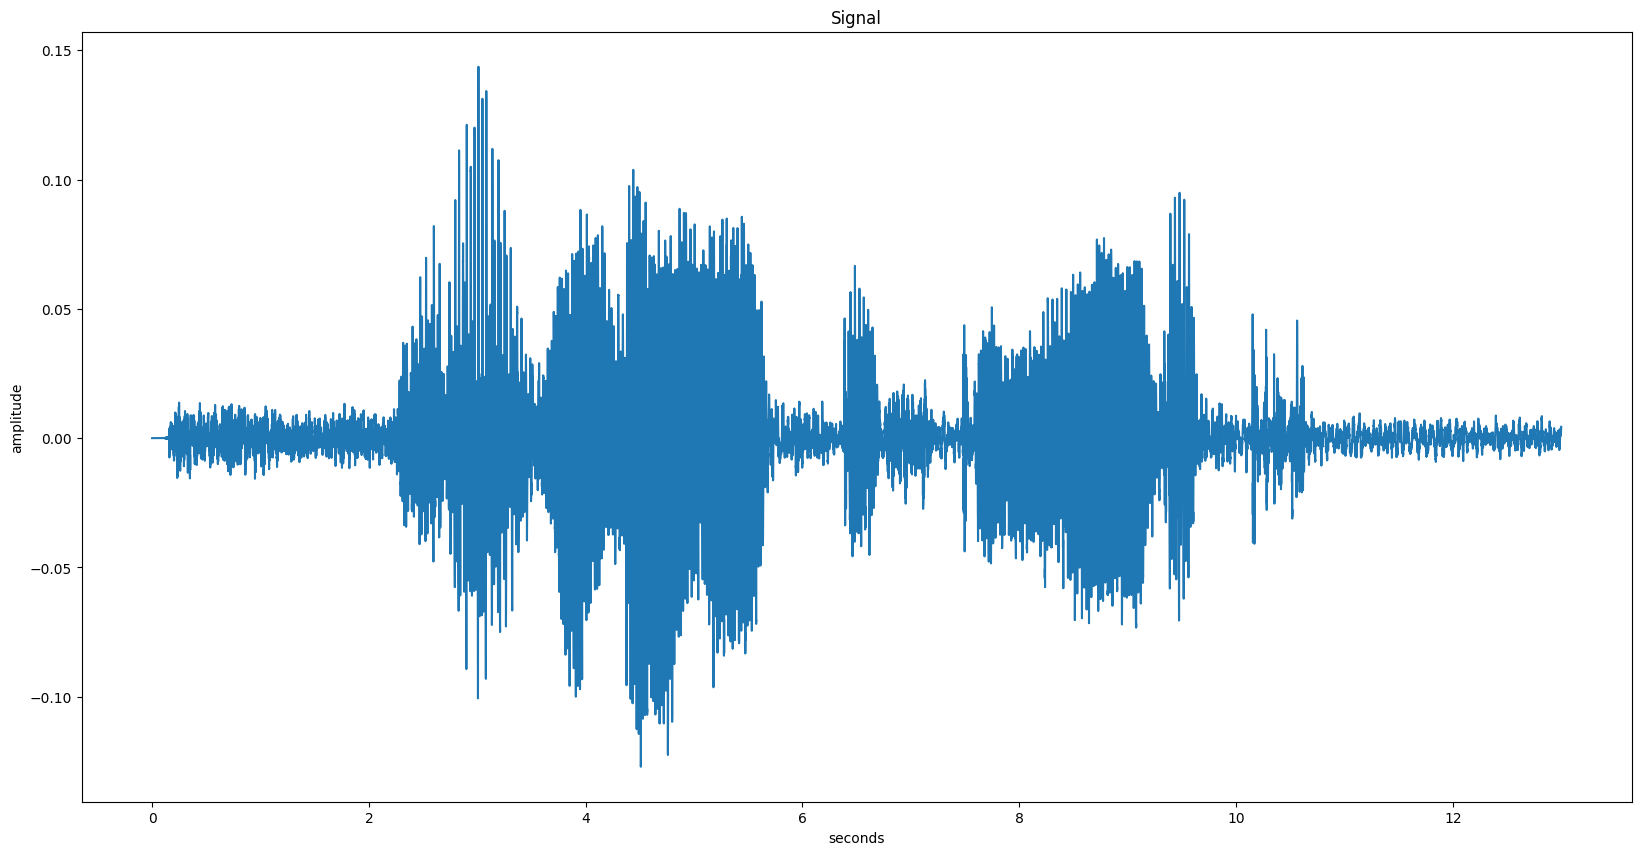

In [11]:
plt.figure(figsize=(20,10))
plt.title('Signal')
plt.plot(time,audio_13)
plt.ylabel('amplitude')
plt.xlabel('seconds')
plt.show()


#Signal Trimming/Padding and Visualization:
Trimming or padding the audio signal to a specified length and visualizing the modified signal

In [12]:
audio = whisper.pad_or_trim(audio_13)


In [13]:
#Number of samples in our trimmed/padded audio
n_samples = audio.shape[-1]
#Time of each sample
time = np.linspace(0,(n_samples-1)*delta,n_samples)

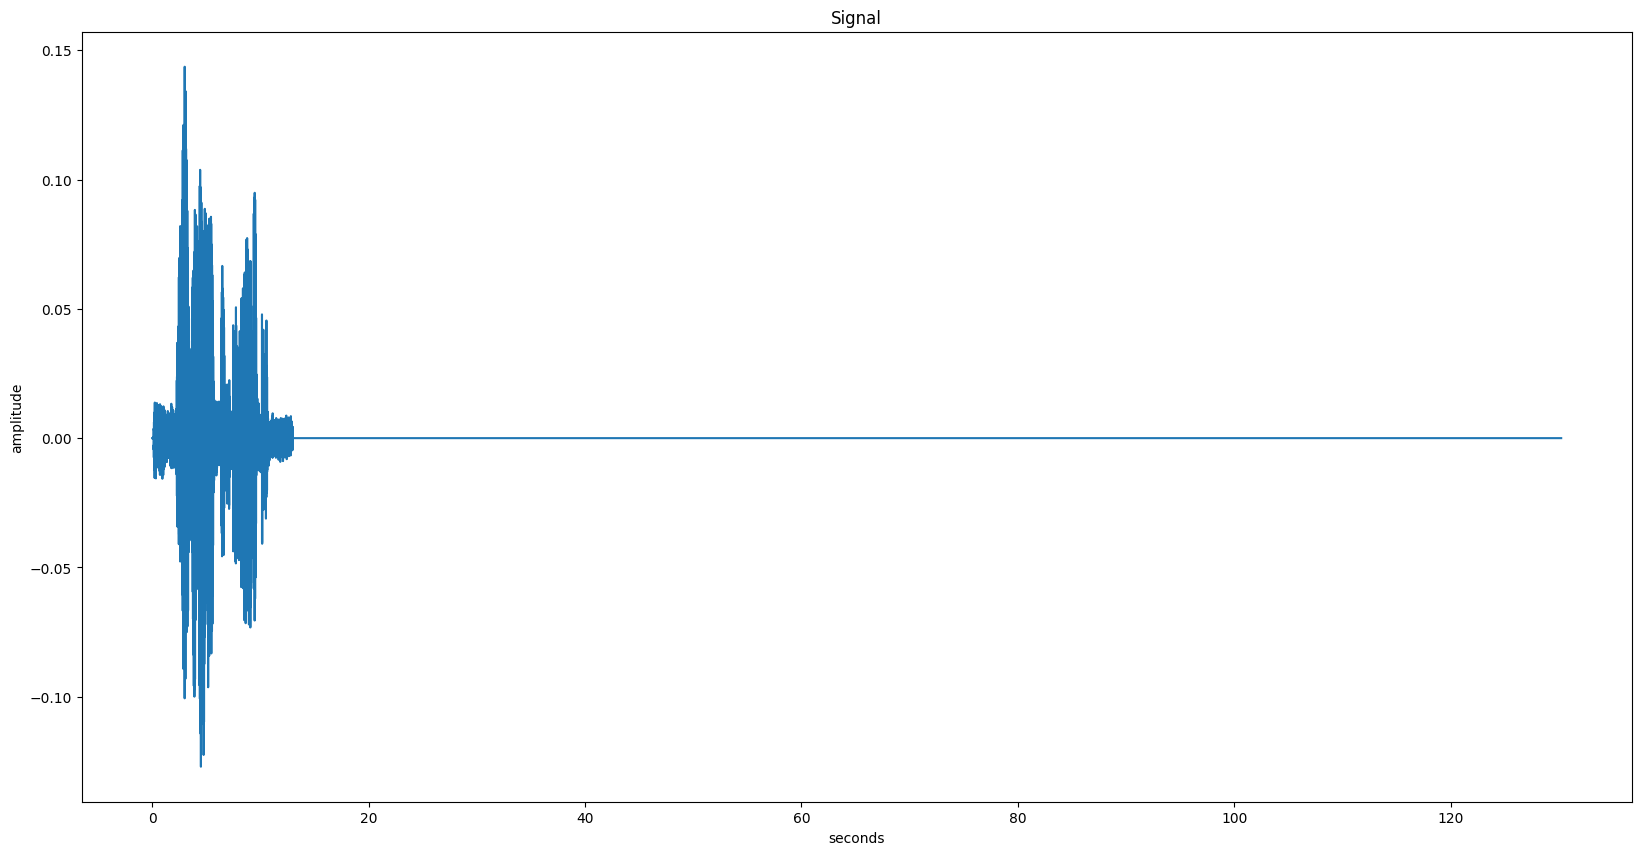

In [14]:
plt.figure(figsize=(20,10))
plt.title('Signal')
plt.plot(time,audio)
plt.ylabel('amplitude')
plt.xlabel('seconds')
plt.show()


#Mel Spectrogram Visualization:
Computing and visualizing the log mel spectrogram of the audio signal.

In [15]:
mel = whisper.log_mel_spectrogram(audio).to(model_m.device)

Text(42.722222222222214, 0.5, 'Mel Scale')

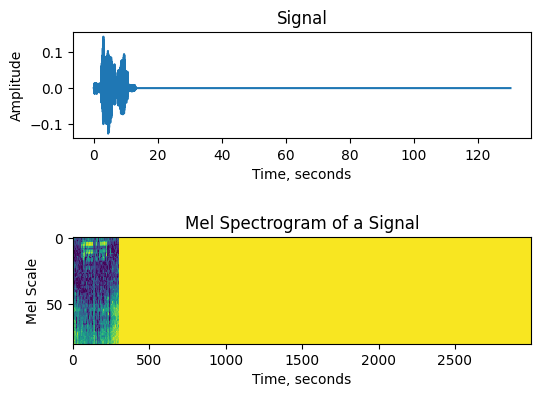

In [16]:
fig, (ax1, ax2) = plt.subplots(2)
fig.tight_layout(pad=5.0)
ax1.plot(time, audio)
ax1.set_title('Signal')
ax1.set_xlabel('Time, seconds')
ax1.set_ylabel('Amplitude')
# Move the tensor to CPU before converting to NumPy array
mel_cpu = mel.cpu().numpy()
ax2.imshow((mel_cpu * mel_cpu) ** (1/2), interpolation='nearest', aspect='auto')
ax2.set_title('Mel Spectrogram of a Signal')
ax2.set_xlabel('Time, seconds')
ax2.set_ylabel('Mel Scale')


#Audio Playback:
Playing back the audio using IPython's Audio module.

In [17]:
sr=22050
ipd.Audio(audio, rate=sr)

#Language Detection:
Detecting the language of the audio using the Whisper model.

In [18]:
#Language Detection
probs = model_m.detect_language(mel)
probs

(tensor(50259),
 {'en': 0.6077218055725098,
  'sq': 1.2172362175988383e-06,
  'fr': 0.0010433614952489734,
  'mr': 0.00048257404705509543,
  'uk': 0.0003826558240689337,
  'bn': 0.0016735506942495704,
  'eu': 8.587110755797767e-07,
  'vi': 0.00047931389417499304,
  'bg': 0.00023090474132914096,
  'kk': 4.2492602005950175e-06,
  'gl': 2.4643226424814202e-05,
  'my': 1.990286909858696e-05,
  'tl': 0.0025908201932907104,
  'pa': 0.00019594610785134137,
  'so': 9.439266364097421e-07,
  'si': 0.0021776899229735136,
  'ar': 0.0011157398112118244,
  'zh': 0.0018411657074466348,
  'is': 6.75434130243957e-05,
  'yi': 2.3503960164816817e-06,
  'tt': 2.101678546750918e-07,
  'ro': 0.0007415833533741534,
  'as': 1.3806470633426215e-05,
  'it': 0.0011413864558562636,
  'pl': 0.00015953263209667057,
  'bs': 1.7958720377464488e-07,
  'ta': 0.08204705268144608,
  'am': 8.948572940425947e-06,
  'tg': 3.087509128363308e-07,
  'sl': 6.7075714468956e-05,
  'uz': 1.0380911419360928e-07,
  'es': 0.002027574

#Transcription:
Transcribing the audio file using the Whisper model.

In [19]:
# transcription
transcription = model_m.transcribe(file_path, fp16 = False)['text']
transcription


' Hello, hello mic testing 1, 2, 3'

#Translation:
Translating the transcribed text into different languages using the Whisper model.

In [20]:
# translation
translation = model_m.transcribe(file_path, language = 'Japanese', fp16 = False)['text']
translation

'ハロー、ハロー、マイクテスト1、2、3'

In [21]:
translation_2 = model_m.transcribe(file_path, language = 'Tamil', fp16 = False)['text']
translation_2

' வணக்கம் வணக்கம் மைக் காண்பிக்கும் 1,2,3'

In [25]:
translation_3= model_m.transcribe(file_path, language = 'Korean', fp16 = False)['text']
translation_3

' 안녕하세요 마이크 테스팅 1,2,3'